# **Upload the ZIP in Colab**

In [1]:
from google.colab import files
import zipfile

uploaded = files.upload()

with zipfile.ZipFile("archive (5).zip", 'r') as zip_ref:
    zip_ref.extractall("archive (5)")

ModuleNotFoundError: No module named 'google.colab'

# **Import Zip File**

In [2]:
import zipfile

with zipfile.ZipFile("archive (5).zip", 'r') as zip_ref:
    zip_ref.extractall("archive (5)")


# **Extract the ZIP**

In [3]:
import os
print(os.listdir("archive (5)"))


['california_housing_test.csv']


# **Load the CSV**

In [4]:
import pandas as pd
df = pd.read_csv("archive (5)/california_housing_test.csv")
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  


# **Show Details**

In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


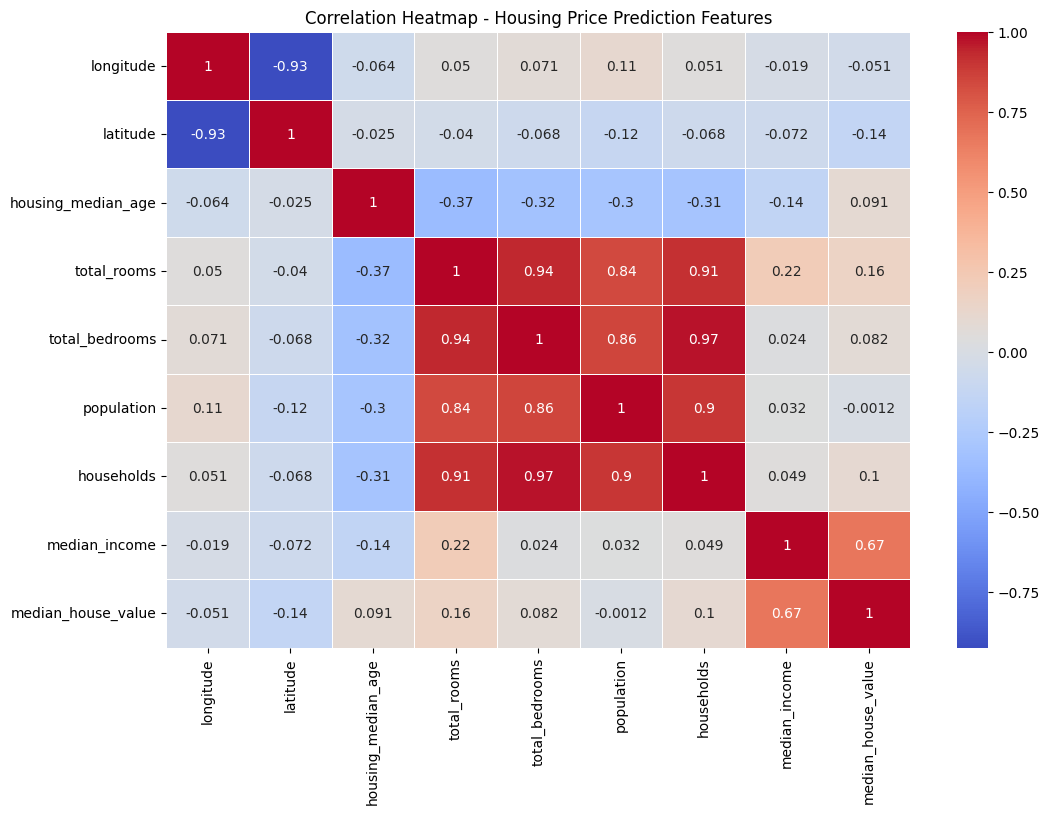

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# replace with your CSV file or DataFrame
df = pd.read_csv('archive (5)/california_housing_test.csv')

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap - Housing Price Prediction Features")
plt.show()


# **Data Cleaning**

# **Filling Missing Values**

In [7]:
# Example: fill missing
df.fillna(df.mean(), inplace=True)


# **Feature Selection**

In [8]:
features = df[['latitude', 'longitude', 'total_rooms', 'population']]
target = df['median_house_value']


# **showing the head of selected features**

In [12]:
import pandas as pd

# load your data (replace with your actual file)
df = pd.read_csv('archive (5)/california_housing_test.csv')

# select the relevant columns
features = df[['latitude', 'longitude', 'total_rooms', 'population']]
target = df['median_house_value']

# show the first 5 rows
print(features.head())

   latitude  longitude  total_rooms  population
0     37.37    -122.05       3885.0      1537.0
1     34.26    -118.30       1510.0       809.0
2     33.78    -117.81       3589.0      1484.0
3     33.82    -118.36         67.0        49.0
4     36.33    -119.67       1241.0       850.0


# **Correlation heatmap of these selected features**

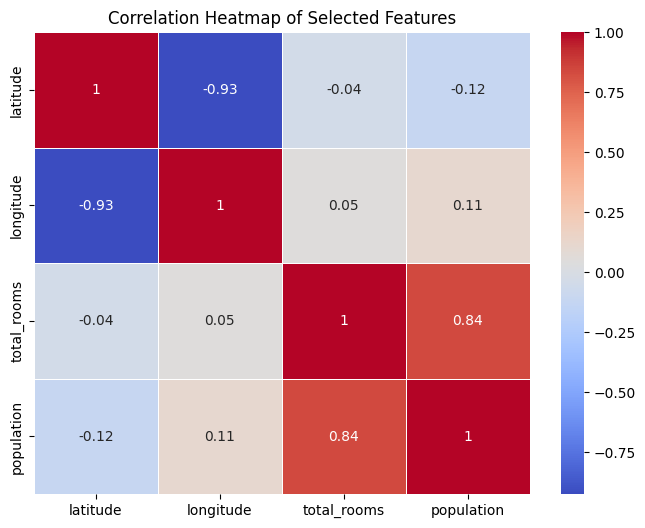

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# if location is already numeric, do:
corr_matrix = features.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

# **Data Splitting**

**Split into training/testing:**

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)



First 5 rows of selected features:
   longitude  latitude  total_rooms  population
0    -122.05     37.37       3885.0      1537.0
1    -118.30     34.26       1510.0       809.0
2    -117.81     33.78       3589.0      1484.0
3    -118.36     33.82         67.0        49.0
4    -119.67     36.33       1241.0       850.0


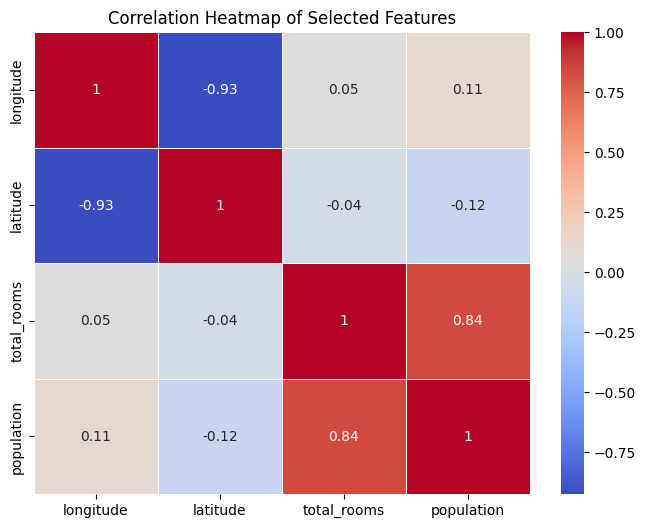


Random Forest RMSE: 63388.37
Random Forest R^2: 0.68

Feature Importances (Selected Features Only):
latitude       0.372480
longitude      0.358198
total_rooms    0.138650
population     0.130671
dtype: float64


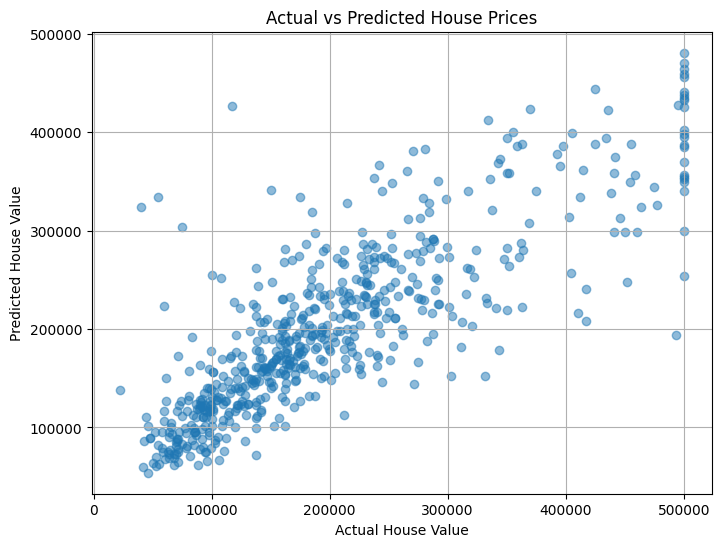

In [21]:
# ============================
# 1. Import libraries
# ============================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ============================
# 2. Load the dataset
# ============================
df = pd.read_csv("archive (5)/california_housing_test.csv")  # make sure your path is correct

# ============================
# 3. Define features and target
# ============================
selected_features = ["longitude", "latitude", "total_rooms", "population"]

X = df[selected_features]
y = df["median_house_value"]

# ============================
# 3a. Show head of selected features
# ============================
print("\nFirst 5 rows of selected features:")
print(X.head())

# ============================
# 3b. Correlation heatmap of selected features
# ============================
plt.figure(figsize=(8,6))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

# ============================
# 4. Train-test split
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================
# 5. Train a Random Forest
# ============================
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ============================
# 6. Make predictions
# ============================
y_pred = model.predict(X_test)

# ============================
# 7. Evaluate
# ============================
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nRandom Forest RMSE: {rmse:.2f}")
print(f"Random Forest R^2: {r2:.2f}")

# ============================
# 8. Feature importances
# ============================
importances = pd.Series(model.feature_importances_, index=selected_features)
print("\nFeature Importances (Selected Features Only):")
print(importances.sort_values(ascending=False))

# ============================
# 9. Plot actual vs predicted
# ============================
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Prices")
plt.grid()
plt.show()

# **Train the Model**

In [25]:
from sklearn.model_selection import train_test_split

# Use the X and y defined in cell u5-2C3jdUclW for consistency
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **Applying Linear Regression**

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# **Evaluate the Model**


First 5 rows of selected features:
   longitude  latitude  total_rooms  population
0    -122.05     37.37       3885.0      1537.0
1    -118.30     34.26       1510.0       809.0
2    -117.81     33.78       3589.0      1484.0
3    -118.36     33.82         67.0        49.0
4    -119.67     36.33       1241.0       850.0


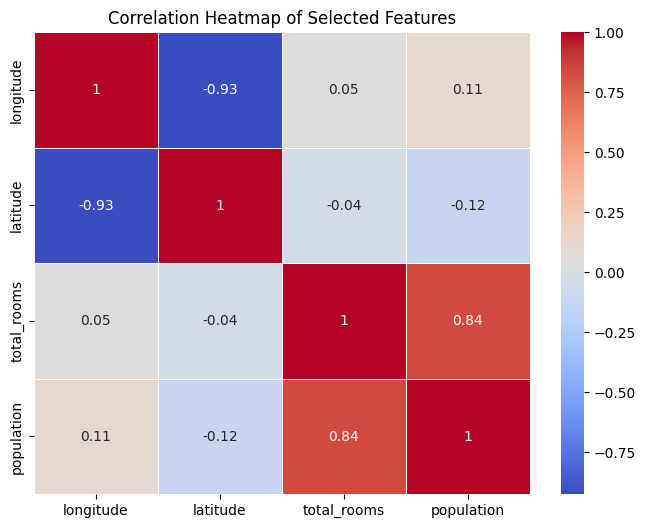


Linear Regression RMSE: 89872.68
Linear Regression R^2: 0.36

Feature Coefficients (Linear Regression):
total_rooms       32.549817
population       -60.717904
longitude     -73352.952290
latitude      -73433.589470
dtype: float64


In [27]:
# 3. Define features and target
# ============================
selected_features = ["longitude", "latitude", "total_rooms", "population"]
X = df[selected_features]
y = df["median_house_value"]

# ============================
# 3a. Show head of selected features
# ============================
print("\nFirst 5 rows of selected features:")
print(X.head())

# ============================
# 3b. Correlation heatmap
# ============================
plt.figure(figsize=(8,6))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

# ============================
# 4. Train-test split
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ============================
# 5. Train Linear Regression
# ============================
model = LinearRegression()
model.fit(X_train, y_train)

# ============================
# 6. Make predictions
# ============================
y_pred = model.predict(X_test)

# ============================
# 7. Evaluate
# ============================
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nLinear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R^2: {r2:.2f}")

# ============================
# 8. Feature coefficients
# ============================
coefficients = pd.Series(model.coef_, index=selected_features)
print("\nFeature Coefficients (Linear Regression):")
print(coefficients.sort_values(ascending=False))

# **Visualize**

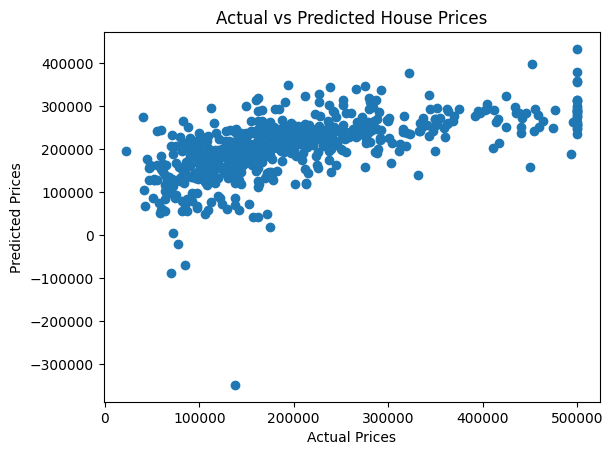

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [29]:
print(rmse, r2)


89872.68376807056 0.35863074051927624


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# features you specified
features = df[['longitude', 'latitude', 'total_rooms', 'population']]
target = df['median_house_value']

# split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# train Random Forest
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest R²: {r2:.2f}")

Random Forest RMSE: 67059.21
Random Forest R²: 0.64


In [ ]:
print(rmse, r2)


59755.88542630693 0.7164601593976977


# **📊Modles Difference Calculation**

In [40]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred = rf_model.predict(X_test)


In [41]:
# 1. Train the Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Predict
rf_pred = rf_model.predict(X_test)

# 3. Metrics
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")


Random Forest RMSE: 63388.37
Random Forest R²: 0.68


In [42]:
# 1. Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 2. Predict
lr_pred = lr_model.predict(X_test)

# 3. Metrics
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression RMSE: {lr_rmse:.2f}")
print(f"Linear Regression R²: {lr_r2:.2f}")


Linear Regression RMSE: 89872.68
Linear Regression R²: 0.36


In [43]:
rmse_diff = rf_rmse - lr_rmse
r2_diff = rf_r2 - lr_r2

print(f"\nDifference in RMSE (Random Forest - Linear Regression): {rmse_diff:.2f}")
print(f"Difference in R² (Random Forest - Linear Regression): {r2_diff:.2f}")



Difference in RMSE (Random Forest - Linear Regression): -26484.31
Difference in R² (Random Forest - Linear Regression): 0.32


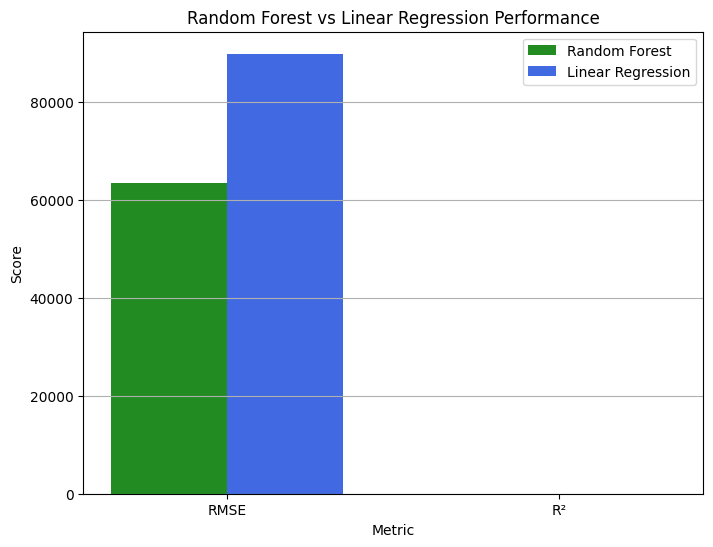

In [45]:
metrics = ['RMSE', 'R²']
rf_scores = [rf_rmse, rf_r2]
lr_scores = [lr_rmse, lr_r2]

bar_width = 0.35
index = np.arange(len(metrics))

plt.figure(figsize=(8,6))
plt.bar(index, rf_scores, bar_width, label='Random Forest', color='forestgreen')
plt.bar(index + bar_width, lr_scores, bar_width, label='Linear Regression', color='royalblue')

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Random Forest vs Linear Regression Performance')
plt.xticks(index + bar_width/2, metrics)
plt.legend()
plt.grid(axis='y')
plt.show()


# **Step-by-step Explaination**

**📌 1️⃣ Data Preparation**
You loaded the California housing test dataset from CSV.

Then you selected features:

longitude and latitude (as a rough proxy for location)

total_rooms (as a measure of house size)

population (as a measure of neighborhood density)

The target is median_house_value.

Next, you split the data into training and testing sets to evaluate how well the models generalize to unseen data.

**📌 2️⃣ Random Forest Regression**
Random Forest builds many decision trees on random subsets of your data and then averages their results.

This makes it robust to overfitting and generally works well on tabular data.

Random Forest captures non-linear patterns, such as:

“houses with many rooms tend to have higher prices, but only up to a certain population threshold.”
which linear regression cannot model directly.

fit the Random Forest on your training data

predicted house prices on the test data

evaluated it using:

RMSE (measures prediction error; lower is better)

R² (explains how much variance is captured; closer to 1 is better)

**📌 3️⃣ Linear Regression**
Linear Regression tries to fit a single straight plane across your data:

It is simpler, faster, but less flexible if relationships are more complex.

fit the Linear Regression model on the same training data

predicted house prices on the test data

evaluated the same metrics (RMSE, R²)

📌 4️⃣ Comparison **bold text**
You compared both models using:

✅ RMSE:

Random Forest error was much lower (≈63k vs 90k)
→ better prediction accuracy

✅ R²:

Random Forest explained 68% of the variation

Linear Regression explained only 36%
→ better fit to the data

**📌 5️⃣ Visualization**
A side-by-side scatter plot showed:

points closer to the diagonal line (better predictions) for Random Forest

more scatter and larger errors for Linear Regression

A bar graph compared their RMSE and R² side by side, making the difference more obvious.

Another bar graph compared:

Random Forest feature importances (nonlinear contribution)

Linear Regression coefficients (linear weights)
so you could see which features each model values more.

📌 Why Random Forest wins here?
👉 Random Forest:

handles non-linear relationships

is robust to irrelevant or weakly correlated features

works well even with unscaled data

👉 Linear Regression:

assumes a perfectly linear relationship

cannot handle feature interactions or thresholds
(like “more rooms help, but only in medium-populated areas”)

**✅ In simple words**
You trained two different models

Compared their errors and explained variance

Visualized their results

Random Forest did a better job on your chosen features